In [85]:
import pandas as pd
import numpy as np

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import seaborn as sns

In [88]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 

In [89]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [90]:
Campaigns_only_df = pd.read_csv("campaign_sum_data.csv")

In [91]:
Complete_secure_df = pd.read_csv("Complete_Secure_Dataset.csv")

In [92]:
Campaigns_only_df.sort_values("Total Bounces", ascending=False)

,Title,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,...,Click Rate,Total Clicks,Unsubscribes,Abuse Complaints,Times Liked on Facebook,Folder Id,Unique Id,Total Orders,Total Gross Sales,Total Revenue
9,Love Parade and More,NaN,Lightsource,"May 05, 2019 07:30 am",Sunday,1809,1570,121,118,239,...,0.25%,0,11,0,0,0,a94ce6d5bc,0,0,0
10,Love Parade and More | Winner,Disrupt With LOVE! Parade For Love Next Sunday,Lightsource,"May 05, 2019 11:29 am",Sunday,1412,1217,102,93,195,...,0.16%,2,8,0,0,0,c1a600e566,0,0,0
3,Free Hugs,10 year anniversary of FREE HUGS NYC - Come ou...,Lightsource,"Mar 11, 2019 07:30 am",Monday,1890,1700,46,144,190,...,0.12%,2,20,0,0,0,325eb1f748,0,0,0
0,Lightsource Envisioning 2019: Meetup & Tea Par...,Lightsource Envisioning 2019: Meetup & Tea Par...,Lightsource,"Dec 12, 2018 07:45 am",Wednesday,937,783,28,126,154,...,0.13%,1,14,0,0,0,dfbbba4bf8,0,0,0
13,Love Parade Last Shoutout,NaN,Lightsource,"May 09, 2019 08:30 am",Thursday,1682,1558,124,0,124,...,0.32%,0,9,0,0,0,cbeb25b286,0,0,0
4,Stickers 2019 fundraiser,LAST CHANCE get free pack of stickers before t...,Lightsource,"Mar 16, 2019 08:45 am",Saturday,1726,1652,33,41,74,...,0.54%,11,38,1,0,0,2cb6b6e6f5,0,0,0
14,Love Parade Last Shoutout | Winner,PARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC A...,Lightsource,"May 09, 2019 05:29 pm",Thursday,1010,940,70,0,70,...,0.43%,5,3,0,0,0,b4c825516b,0,0,0
1,(copy 01),Register as a member before New Years to get y...,Lightsource,"Dec 21, 2018 07:45 am",Friday,1839,1784,39,16,55,...,0.22%,5,65,0,0,0,1e819b6ddd,0,0,0
5,Free Hugs (copy 01),10 year anniversary of FREE HUGS NYC - Come ou...,Lightsource,"Mar 22, 2019 08:15 am",Friday,1648,1594,9,45,54,...,0.19%,3,10,0,0,0,bdfcb490de,0,0,0
2,Escape The Planet // Off To Space,FRIDAY NIGHT - Escape The Planet // OFF TO SPACE,Lightsource,"Feb 21, 2019 09:59 pm",Thursday,1760,1723,31,6,37,...,0.29%,6,31,0,0,0,84c4abc48c,0,0,0


In [93]:
Complete_secure_df.sort_values("email_id").head()

,Unnamed: 0,Bounce Type,Hard Bounces,Member_Rating,Opens,Soft Bounces,Successful Deliveries,Total Bounces,Total Recipients,campaign_id,email_id,Subject
9894,9894,soft,14.0,1.0,0.0,14.0,170.0,28.0,198.0,8,0,Disrupt with JOY! Parade For Love Next Sunday
2988,2988,sent,6.0,2.0,0.0,31.0,1723.0,37.0,1760.0,2,0,FRIDAY NIGHT - Escape The Planet // OFF TO SPACE
10277,10277,sent,0.0,2.0,0.0,29.0,307.0,29.0,336.0,12,0,PARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC A...
373,373,sent,16.0,2.0,0.0,39.0,1784.0,55.0,1839.0,1,0,Register as a member before New Years to get y...
4639,4639,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,0,10 year anniversary of FREE HUGS NYC - Come ou...


In [94]:
Complete_secure_df.drop("Unnamed: 0", axis=1, inplace=True)

In [95]:
Complete_secure_df.sort_values("Hard Bounces", ascending=False)

,Bounce Type,Hard Bounces,Member_Rating,Opens,Soft Bounces,Successful Deliveries,Total Bounces,Total Recipients,campaign_id,email_id,Subject
4797,soft,144.0,1.0,0.0,46.0,1700.0,190.0,1890.0,3,1357,10 year anniversary of FREE HUGS NYC - Come ou...
4216,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,150,10 year anniversary of FREE HUGS NYC - Come ou...
4214,sent,144.0,3.0,0.0,46.0,1700.0,190.0,1890.0,3,686,10 year anniversary of FREE HUGS NYC - Come ou...
4213,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,1384,10 year anniversary of FREE HUGS NYC - Come ou...
4212,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,700,10 year anniversary of FREE HUGS NYC - Come ou...
4211,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,1210,10 year anniversary of FREE HUGS NYC - Come ou...
4210,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,1604,10 year anniversary of FREE HUGS NYC - Come ou...
4209,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,234,10 year anniversary of FREE HUGS NYC - Come ou...
4208,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,1642,10 year anniversary of FREE HUGS NYC - Come ou...
4207,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,197,10 year anniversary of FREE HUGS NYC - Come ou...


In [96]:
Complete_secure_df.dtypes

Bounce Type               object
Hard Bounces             float64
Member_Rating            float64
Opens                    float64
Soft Bounces             float64
Successful Deliveries    float64
Total Bounces            float64
Total Recipients         float64
campaign_id                int64
email_id                   int64
Subject                   object
dtype: object

In [97]:
Complete_secure_df.shape

(11577, 11)

Text(0.5, 1.0, 'Average Email Opens per Campaign')

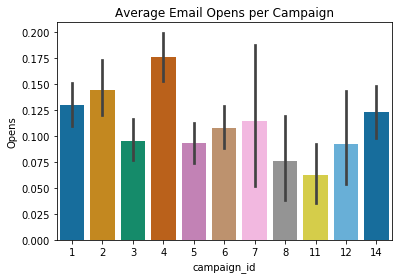

In [98]:
sns.barplot(Complete_secure_df['campaign_id'],
            y = Complete_secure_df["Opens"],
            palette = "colorblind"
           ).set_title("Average Email Opens per Campaign")

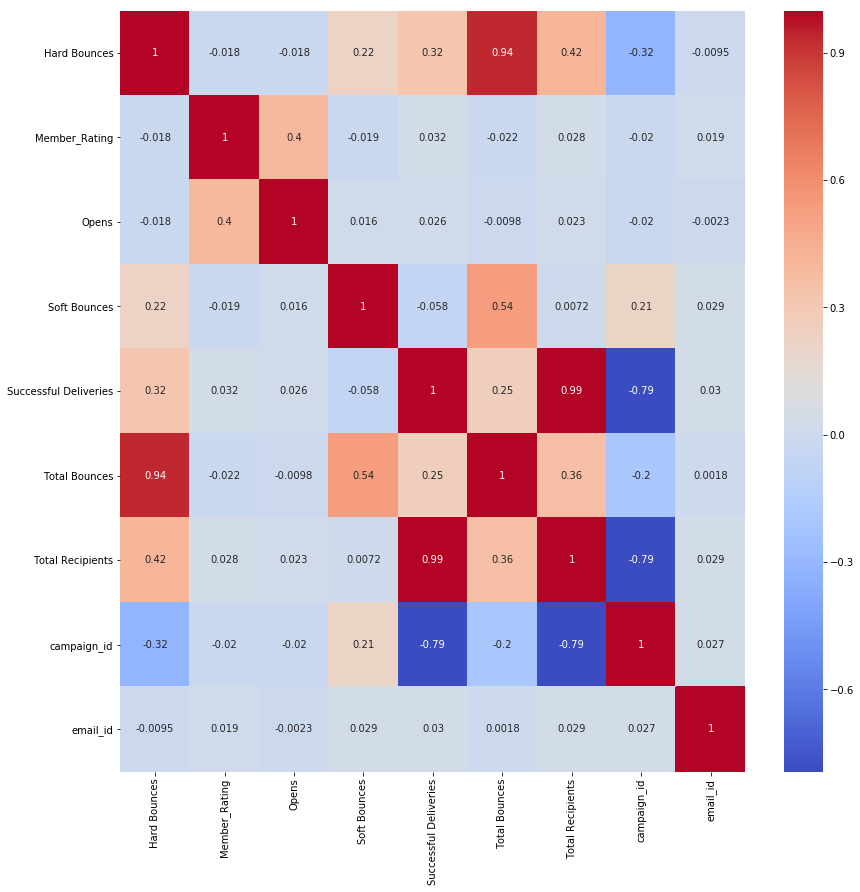

In [52]:
plt.subplots(figsize = (14, 14))
sns.heatmap(Complete_secure_df.corr(),
            cmap='coolwarm',
            annot=True)

### The above heatmap indicates a somewhat meaningful relationship between Member Rating and opens, and a clear attrition of recipients over, time, as our first communication sent in December and onwards resulted in a lot of initial unsubscribes.  We have since added more subscribers.  There is a clear relationship between Overall emails sent, and bounces, which is simply the nature of mass marketing emails.

Text(0.5, 1.0, 'Member Ratings Relationship With Metrics')

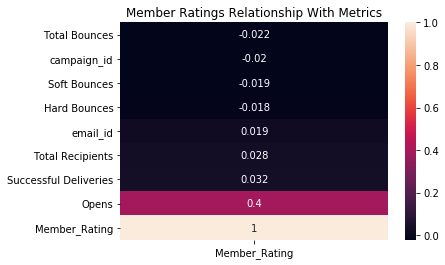

In [53]:
sns.heatmap(Complete_secure_df.corr()[['Member_Rating']].sort_values('Member_Rating'),
            annot=True).set_title("Member Ratings Relationship With Metrics")

Text(0.5, 1.0, 'Relationship of Successful Deliveries with Metrics')

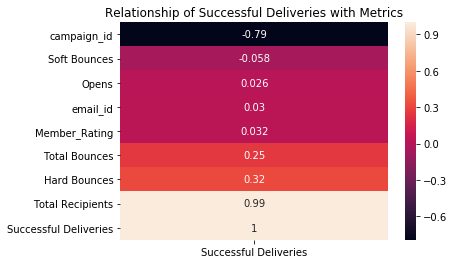

In [27]:
sns.heatmap(Complete_secure_df.corr()[['Successful Deliveries']].sort_values('Successful Deliveries'),
            annot=True).set_title("Relationship of Successful Deliveries with Metrics")

#### The above may imply that successful deliveries has the expected relationship with soft, but not hard bounces, due to both old emails needing to be cleared, and some hard spam filters.

#### Update - As I put chronologically newer data into my dataframe, those relationships with soft bounces and hard bounces flip - The total and hard bounce relationship between successful deliveries is predictably significant, at .25 and .32 respectively, but soft bounces has an ambivalent relationship.

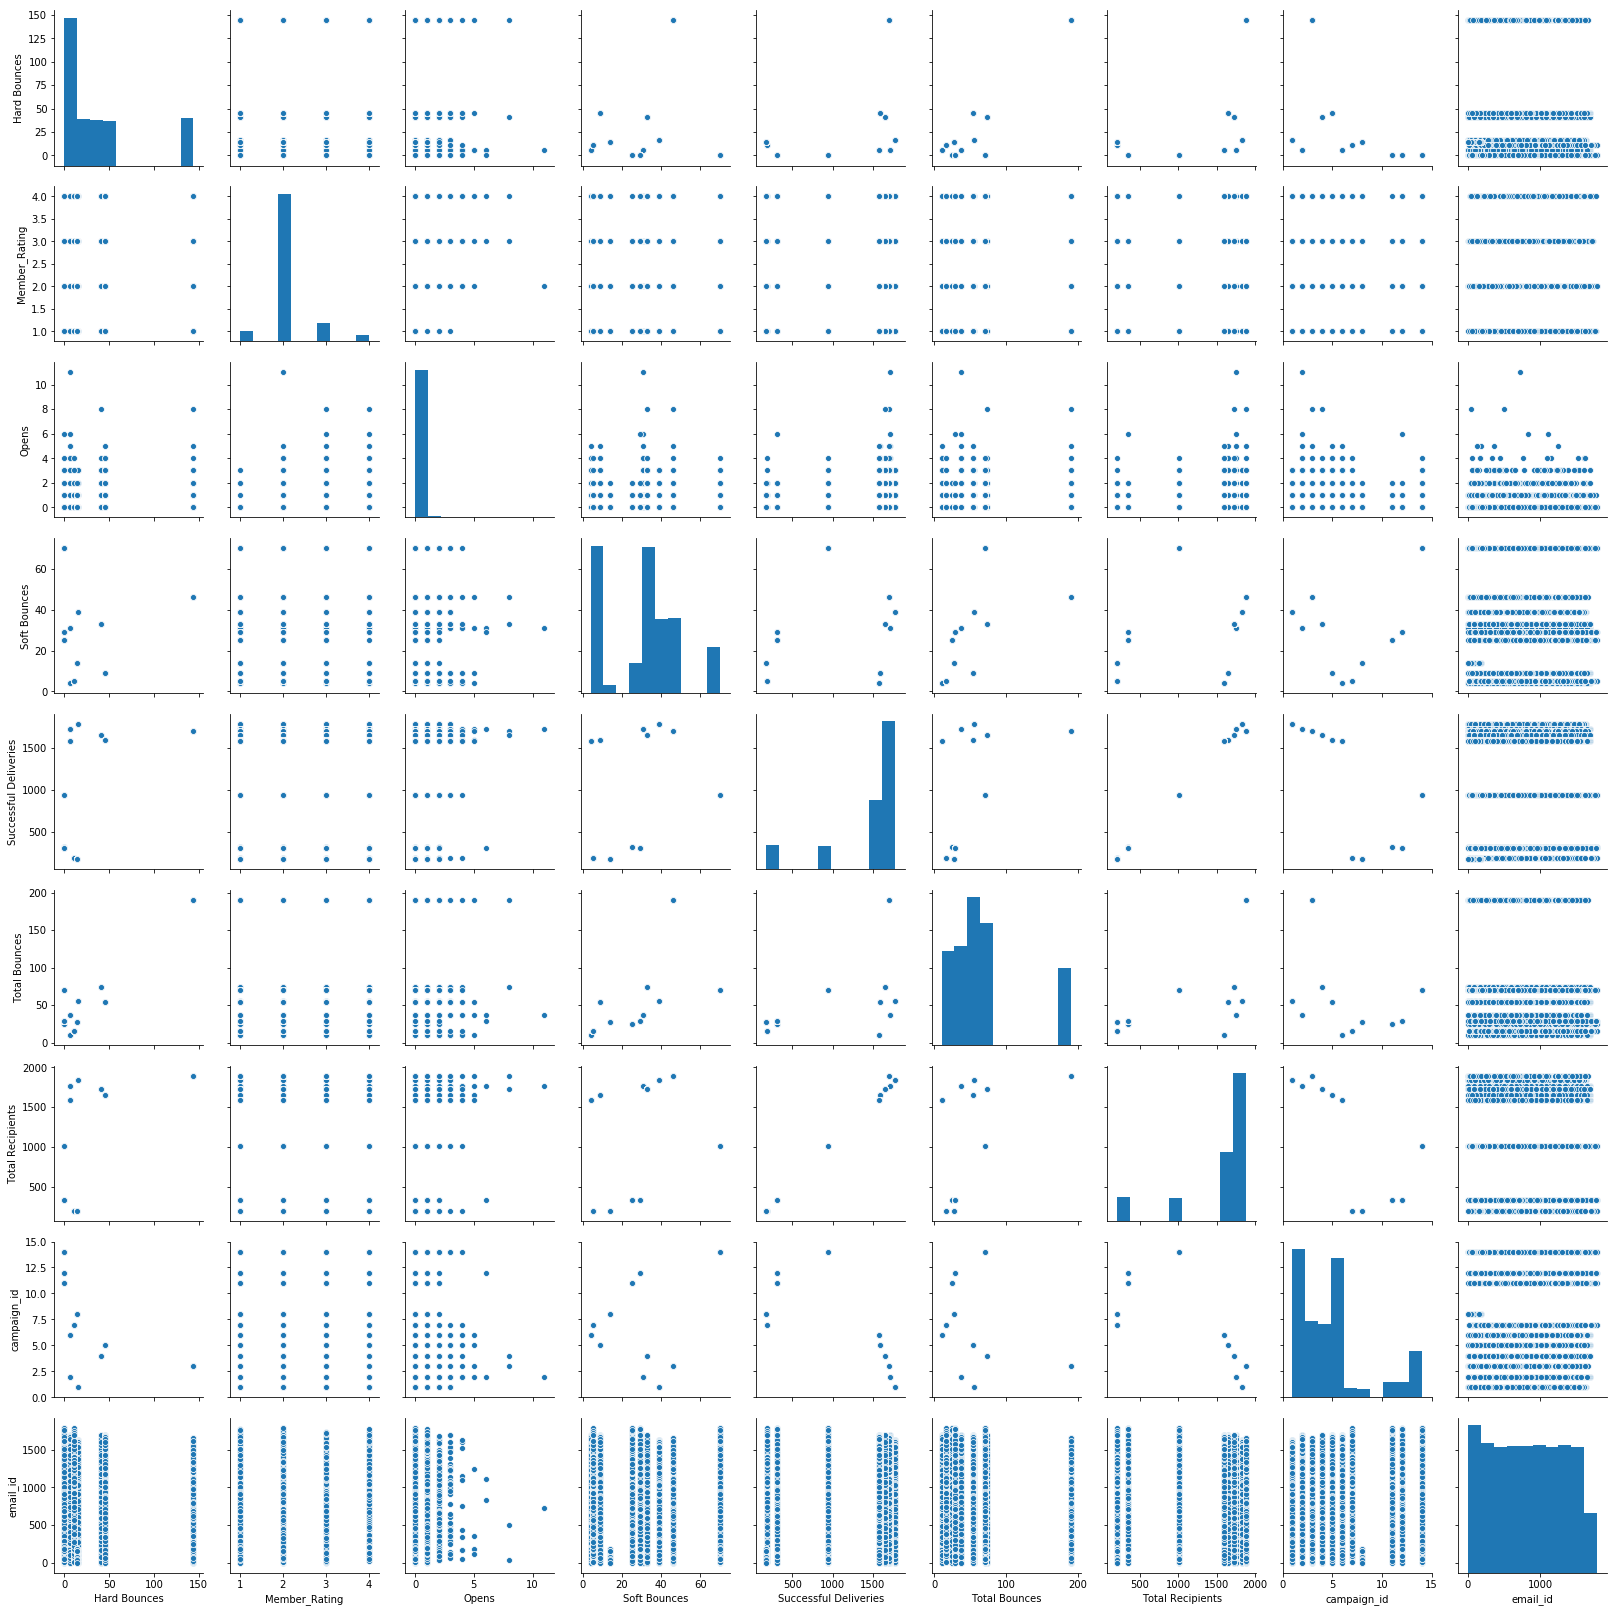

In [28]:
sns.pairplot(Complete_secure_df)

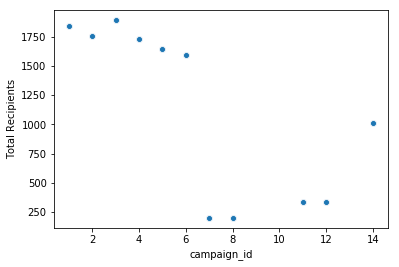

In [40]:
sns.scatterplot(x=Complete_secure_df["campaign_id"],
                y=Complete_secure_df["Total Recipients"])

this wonky looking partially negative relationship in the first couple points, with other similar patterns appearing in the set of pairplots above, demonstrates subscriber attrition early on when we first started sending out mass newsletters.

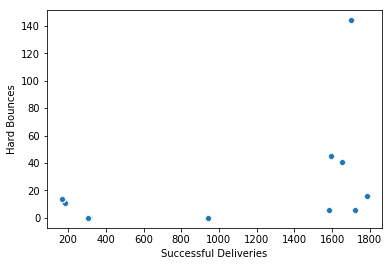

In [29]:
sns.scatterplot(Complete_secure_df["Successful Deliveries"],
            Complete_secure_df["Hard Bounces"])

Unusually high hard bounces for campaign ID 3 is noteworthy.

Text(0.5, 1.0, 'Average Email Opens per Campaign')

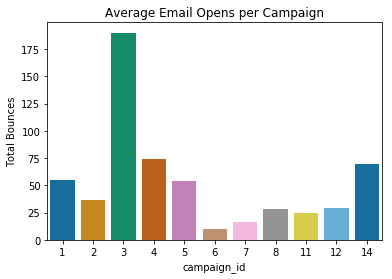

In [100]:
sns.barplot(Complete_secure_df['campaign_id'],
            y = Complete_secure_df["Total Bounces"],
            palette = "colorblind"
           ).set_title("Average Email Opens per Campaign")

Text(0.5, 1.0, 'Average Email Opens per Campaign')

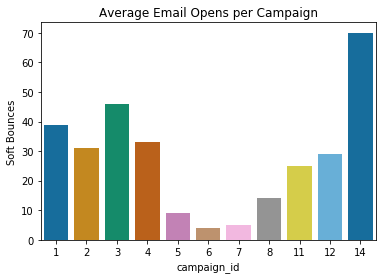

In [101]:
sns.barplot(Complete_secure_df['campaign_id'],
            y = Complete_secure_df["Soft Bounces"],
            palette = "colorblind"
           ).set_title("Average Email Opens per Campaign")

Text(0.5, 1.0, 'Average Email Opens per Campaign')

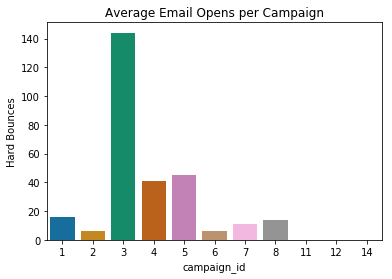

In [102]:
sns.barplot(Complete_secure_df['campaign_id'],
            y = Complete_secure_df["Hard Bounces"],
            palette = "colorblind"
           ).set_title("Average Email Opens per Campaign")

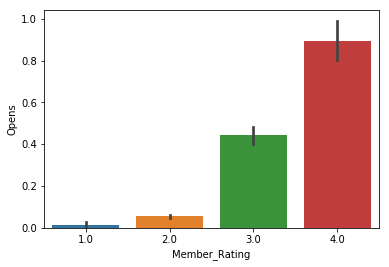

In [56]:
sns.barplot(x = Complete_secure_df["Member_Rating"],
            y = Complete_secure_df["Opens"])

In [57]:
#ax = Complete_secure_df.plot.bar(x= "Member_Rating", y= "Opens")

Text(0.5, 1.0, 'Member Ratings and Email Opens')

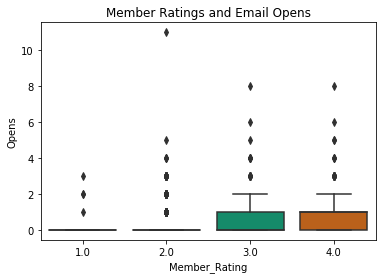

In [58]:
# Ratings are a function of member opens and clicks divided by emails sent to them
#https://organicweb.com.au/marketing/mailchimp-member-ratings/ 

sns.boxplot(Complete_secure_df['Member_Rating'],
            y = Complete_secure_df["Opens"],
            palette = "colorblind",
           ).set_title("Member Ratings and Email Opens")

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x1368e7198>>

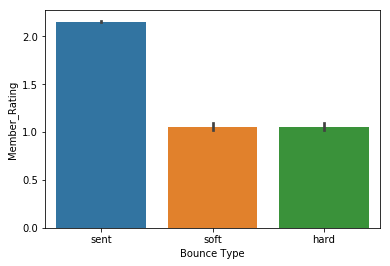

In [59]:
sns.barplot(Complete_secure_df['Bounce Type'],
            y = Complete_secure_df["Member_Rating"]).set

In [60]:
Complete_secure_df.isnull().sum()

Bounce Type              0
Hard Bounces             0
Member_Rating            0
Opens                    0
Soft Bounces             0
Successful Deliveries    0
Total Bounces            0
Total Recipients         0
campaign_id              0
email_id                 0
Subject                  0
dtype: int64

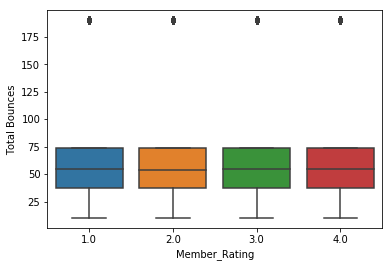

In [61]:
sns.boxplot(Complete_secure_df['Member_Rating'], y = Complete_secure_df["Total Bounces"])

### Let's generate a Wordcloud!

In [62]:
Subject_string = ''
for d in Complete_secure_df["Subject"]:
    Subject_string+=d

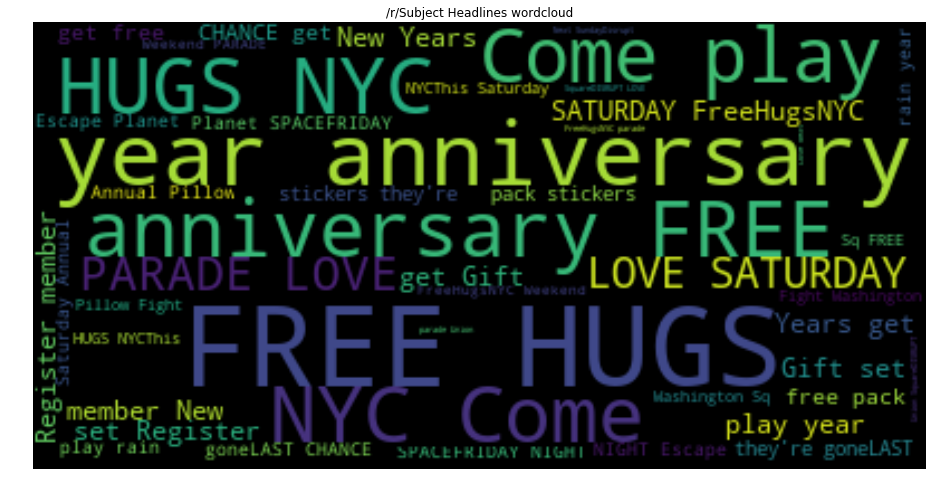

In [63]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80, background_color="black").generate(Subject_string)

plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Subject Headlines wordcloud")

plt.show()

## An Initial NLP model with Count Vectorization on our main target variables

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression

In [66]:
X = Complete_secure_df['Subject']

In [67]:
y = Complete_secure_df['Opens']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3)

In [69]:
cv = CountVectorizer(max_features = 1940, stop_words = stopwords.words('english'))

In [70]:
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [71]:
lr = LinearRegression()

In [72]:
model = lr.fit(X_traincv, y_train)

In [73]:
predictions = model.predict(X_testcv)

In [74]:
model.score(X_traincv, y_train)

0.003675171773721675

In [75]:
model.score(X_testcv, y_test)

0.00613830263610371

In [76]:
#Not very promising results so far.  Let's continue in the modeling notebook!

In [77]:
predictions

array([0.10951009, 0.14397906, 0.14397906, ..., 0.10951009, 0.12647862,
       0.12647862])

In [78]:
bag_of_words = cv.fit_transform(X)

In [79]:
bag_of_words.sum()

82498